# Lets Grow More  

## Beginner Level Task 1 -  Iris Flower Classification

### Importing the necessary modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the data

In [2]:
iris = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data")

In [3]:
df = iris.copy()                  

In [4]:
df.shape

(149, 5)

In [5]:
df.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [6]:
df.columns

Index(['5.1', '3.5', '1.4', '0.2', 'Iris-setosa'], dtype='object')

In [7]:
df.columns = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Flower_Type']

In [8]:
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Flower_Type
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [9]:
df.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
df.isnull().sum()                 # To find the count of Nan values 

SepalLength    0
SepalWidth     0
PetalLength    0
PetalWidth     0
Flower_Type    0
dtype: int64

In [11]:
# Classification on the basis of Flower Types

c1 = df[df.Flower_Type == 'Iris-setosa']
c2 = df[df.Flower_Type == 'Iris-versicolor']
c3 = df[df.Flower_Type == 'Iris-virginica']

In [12]:
c1.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,49.000000,49.000000,49.000000,49.000000
mean,5.004082,3.416327,1.465306,0.244898
std,0.355879,0.384787,0.175061,0.108130
min,4.300000,2.300000,1.000000,0.100000
25%,4.800000,3.100000,1.400000,0.200000
50%,5.000000,3.400000,1.500000,0.200000
75%,5.200000,3.700000,1.600000,0.300000
max,5.800000,4.400000,1.900000,0.600000


In [13]:
c2.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,50.000000,50.000000,50.000000,50.000000
mean,5.936000,2.770000,4.260000,1.326000
std,0.516171,0.313798,0.469911,0.197753
min,4.900000,2.000000,3.000000,1.000000
25%,5.600000,2.525000,4.000000,1.200000
50%,5.900000,2.800000,4.350000,1.300000
75%,6.300000,3.000000,4.600000,1.500000
max,7.000000,3.400000,5.100000,1.800000


In [14]:
c3.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,50.00000,50.000000,50.000000,50.00000
mean,6.58800,2.974000,5.552000,2.02600
std,0.63588,0.322497,0.551895,0.27465
min,4.90000,2.200000,4.500000,1.40000
25%,6.22500,2.800000,5.100000,1.80000
50%,6.50000,3.000000,5.550000,2.00000
75%,6.90000,3.175000,5.875000,2.30000
max,7.90000,3.800000,6.900000,2.50000


In [15]:
df['Flower_Type'].value_counts()            

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        49
Name: Flower_Type, dtype: int64

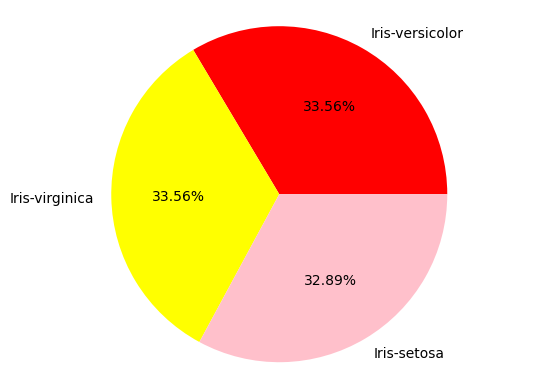

In [16]:
x = [50, 50, 49]
labels = ['Iris-versicolor', 'Iris-virginica', 'Iris-setosa']
colors = ['red', 'yellow', 'pink']
plt.pie(x, labels = labels, colors = colors, autopct = "%.2f%%")

plt.axis("equal")      
plt.show()

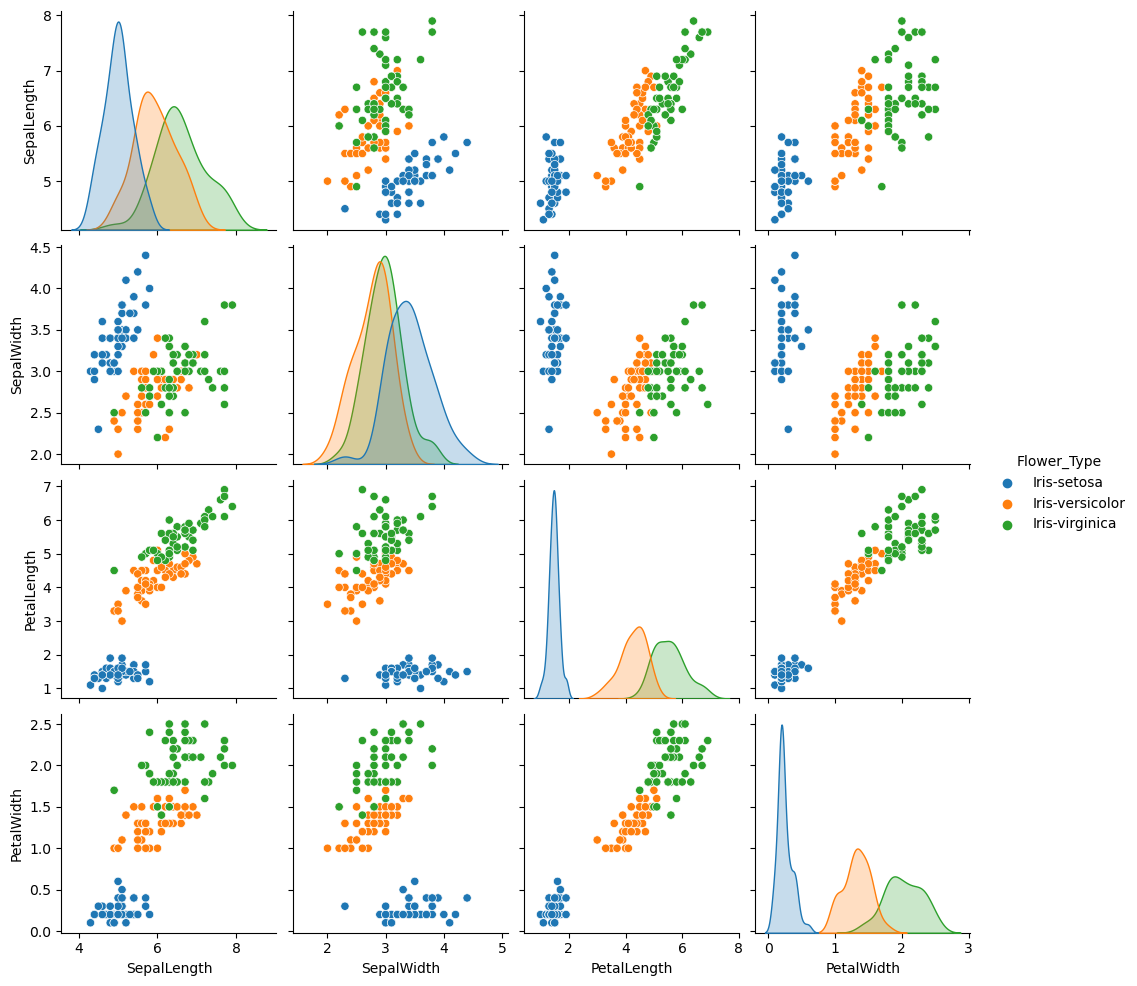

In [17]:
sns.pairplot(df, hue = "Flower_Type")

In [18]:
# To handle string entries, I am assigning 0 -> Iris-versicolor, 1 -> Iris-virginica, 2 -> Iris-setosa

def f(s):
    if s == "Iris-versicolor":
        return 0
    elif (s == "Iris-virginica"):
        return 1
    else:
        return 2
    
df["Species"] = df.Flower_Type.apply(f)
del df["Flower_Type"]

In [19]:
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,4.9,3.0,1.4,0.2,2
1,4.7,3.2,1.3,0.2,2
2,4.6,3.1,1.5,0.2,2
3,5.0,3.6,1.4,0.2,2
4,5.4,3.9,1.7,0.4,2


In [20]:
X = df.iloc[:,:-1]
Y = df.iloc[:, -1]

In [21]:
from sklearn import model_selection
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X,Y,test_size=0.3)

In [22]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(104, 4)
(45, 4)
(104,)
(45,)


In [23]:
from sklearn.linear_model import LogisticRegression
alg1 = LogisticRegression()

In [24]:
alg1.fit(X_train, Y_train)

LogisticRegression()

In [25]:
Y_pred = alg1.predict(X_test)

In [26]:
Y_pred_train = alg1.predict(X_train)

In [27]:
from sklearn.metrics import accuracy_score
print("Accuracy Score : ", accuracy_score(Y_test,Y_pred)*100)

Accuracy Score :  88.88888888888889


In [28]:
from sklearn.metrics import confusion_matrix

In [29]:
confusion_matrix(Y_train, Y_pred_train)

array([[32,  0,  0],
       [ 1, 34,  0],
       [ 0,  0, 37]], dtype=int64)

In [30]:
confusion_matrix(Y_test, Y_pred)

array([[15,  3,  0],
       [ 2, 13,  0],
       [ 0,  0, 12]], dtype=int64)

In [31]:
from sklearn.metrics import classification_report

In [32]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.88      0.83      0.86        18
           1       0.81      0.87      0.84        15
           2       1.00      1.00      1.00        12

    accuracy                           0.89        45
   macro avg       0.90      0.90      0.90        45
weighted avg       0.89      0.89      0.89        45

